## Credit Card Fraud Detection

**Setting a random seed for reproducibility**

In [ ]:
seed = 42

**Importing the required Libraries and Methods**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

**Importing the datasets**

In [ ]:
fraud_train = '/content/drive/MyDrive/Credit Card Fraud_Train/fraudTrain.csv'
fraud_test = '/content/drive/MyDrive/Credit Card Fraud_Test/fraudTest.csv'
ccf_train = pd.read_csv(fraud_train)
ccf_test = pd.read_csv(fraud_test)
ccf_train.shape, ccf_test.shape, len(ccf_train), len(ccf_test)

((1296675, 23), (555719, 23), 1296675, 555719)

### Data Exploration and Preprocessing

In [ ]:
ccf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
ccf_train['is_fraud'].value_counts(), ccf_test['is_fraud'].value_counts()

(is_fraud
 0    1289169
 1       7506
 Name: count, dtype: int64,
 is_fraud
 0    553574
 1      2145
 Name: count, dtype: int64)

**Concatinating the given Train and Test datasets to apply transformations**

In [ ]:
ccf = pd.concat([ccf_train, ccf_test])
ccf.shape

(1852394, 23)

In [ ]:
ccf.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**Dropping the unnecessary features and separating the target**

In [ ]:
X = ccf.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'trans_num', 'street', 'state'], axis = 1)
y = ccf['is_fraud']

In [ ]:
y.value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [ ]:
X.head()

,merchant,category,amt,first,last,gender,city,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


**Label Encoding the non-numeric features**

In [ ]:
le = LabelEncoder()
X['merchant'] = le.fit_transform(X['merchant'])
X['category'] = le.fit_transform(X['category'])
X['first'] = le.fit_transform(X['first'])
X['last'] = le.fit_transform(X['last'])
X['gender'] = le.fit_transform(X['gender'])
X['job'] = le.fit_transform(X['job'])
X['dob'] = le.fit_transform(X['dob'])
X['city'] = le.fit_transform(X['city'])
X.head()

,merchant,category,amt,first,last,gender,city,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,164,18,0,532,28654,36.0788,-81.1781,3495,372,791,1325376018,36.011293,-82.048315,0
1,241,4,107.23,312,161,0,619,99160,48.8878,-118.2105,149,431,619,1325376044,49.159047,-118.186462,0
2,390,0,220.11,116,386,1,474,83252,42.1808,-112.2620,4154,308,309,1325376051,43.150704,-112.154481,0
3,360,2,45.00,165,468,1,84,59632,46.2306,-112.1138,1939,330,405,1325376076,47.034331,-112.561071,0
4,297,9,41.96,339,153,1,217,24433,38.4207,-79.4629,99,116,746,1325376186,38.674999,-78.632459,0


**Calculating the correlation to check if more features can be removed**

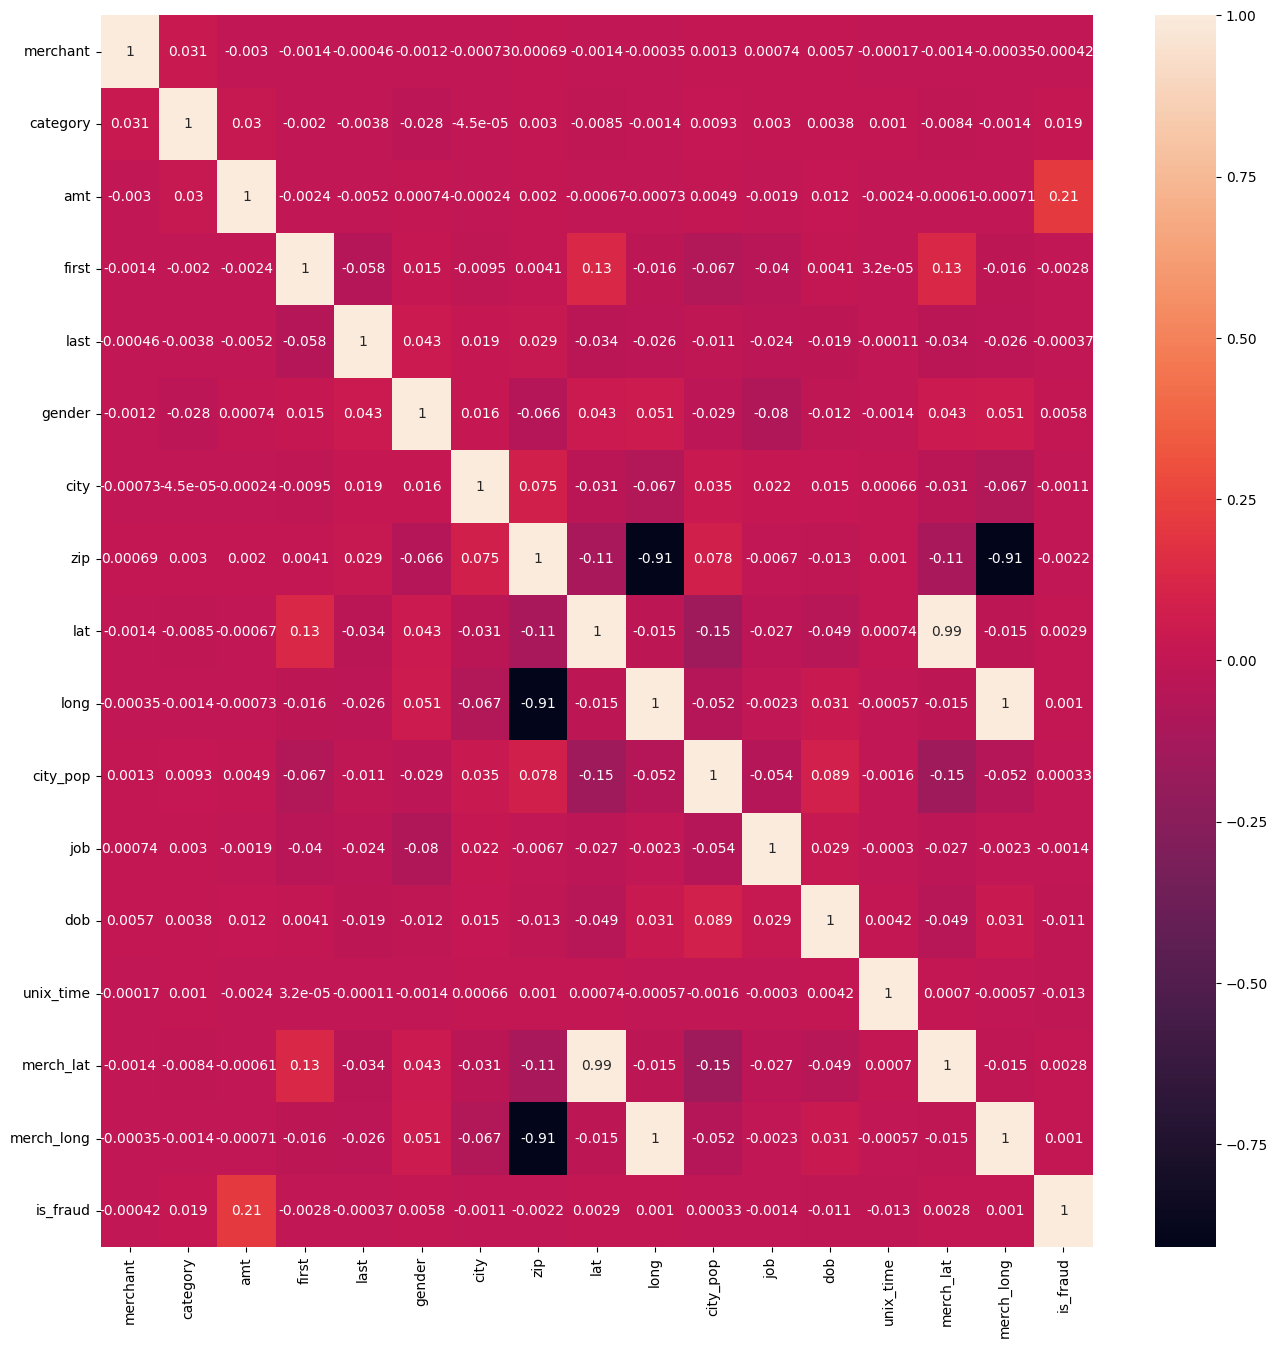

In [ ]:
corr_matrix = X.corr()
plt.figure(figsize = (16, 16))
map = sns.heatmap(corr_matrix, annot = True)
plt.show()

**Separating the fraud and non-fraud transactions to check their relation with different features**

In [ ]:
fraud = X[X['is_fraud'] == 1]
non_fraud = X[X['is_fraud'] == 0]

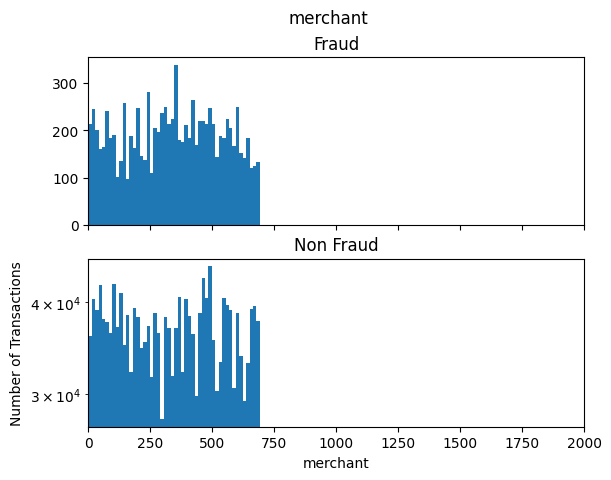

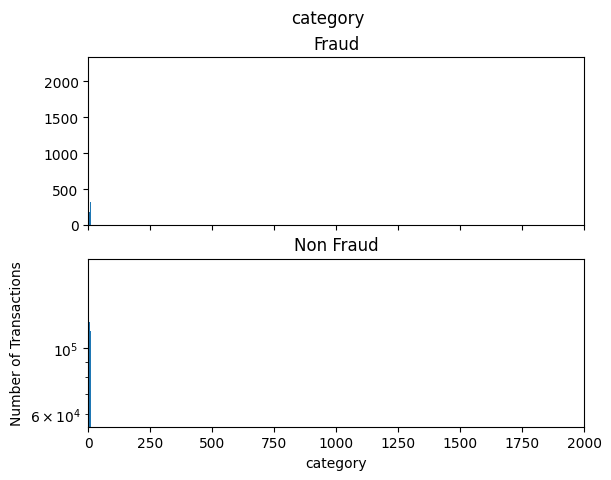

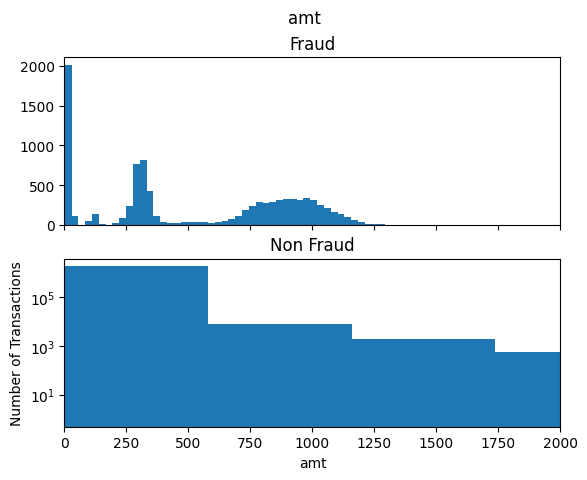

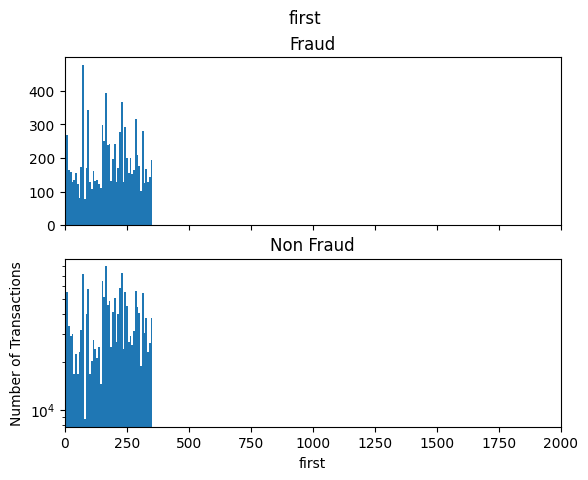

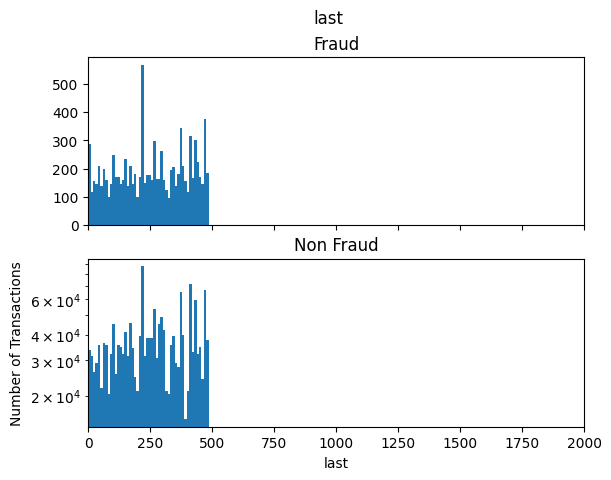

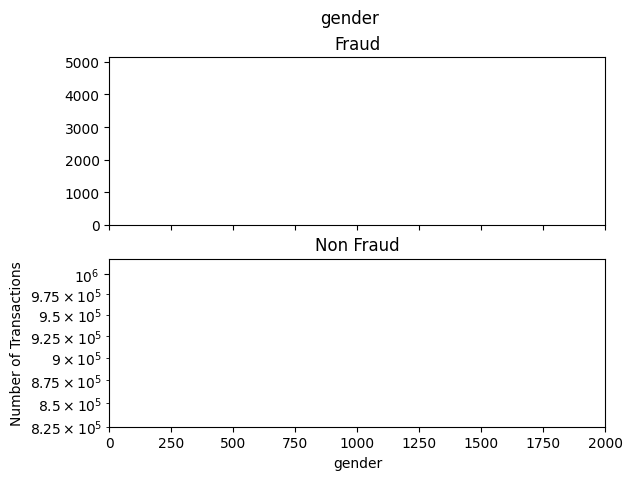

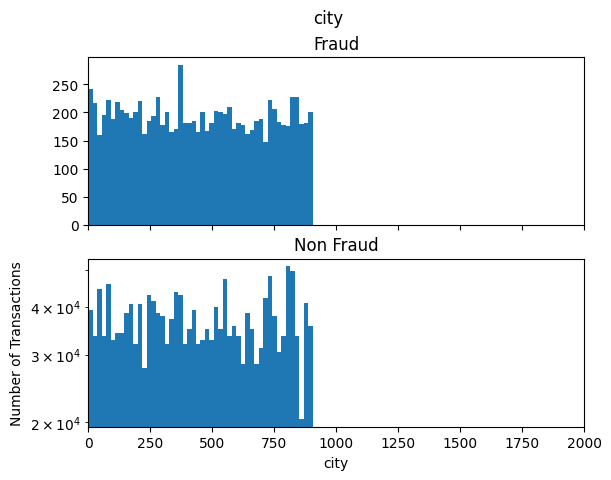

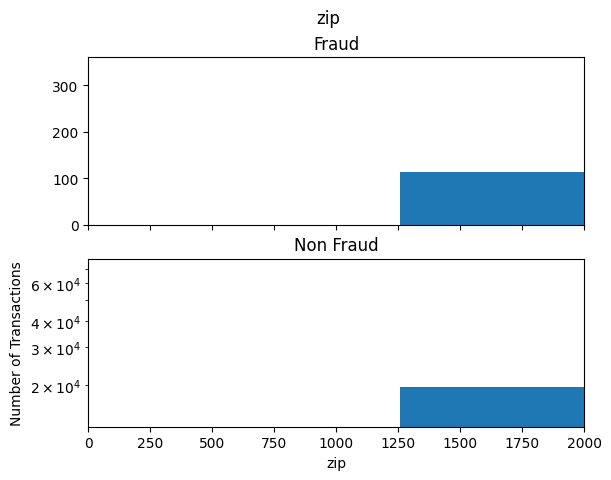

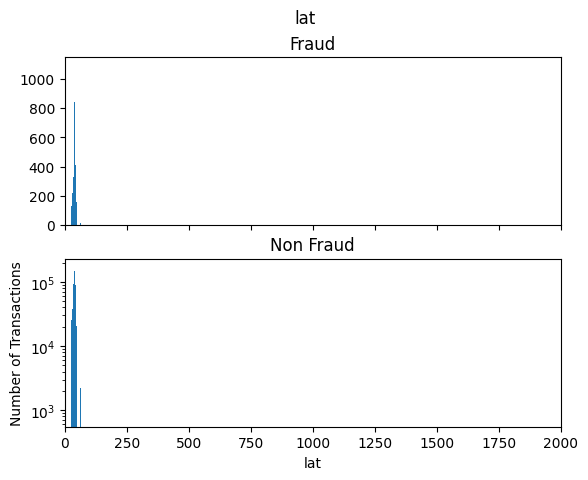

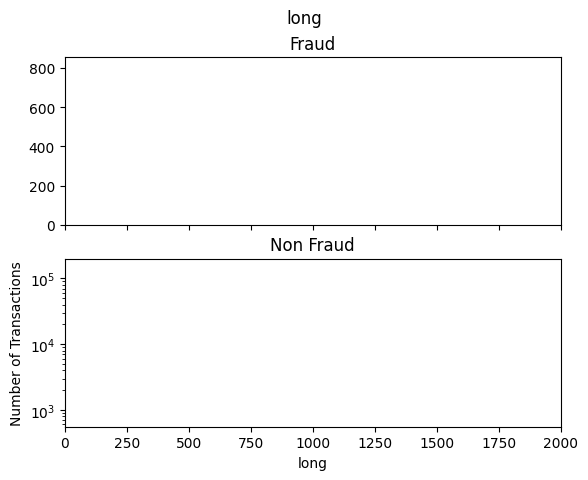

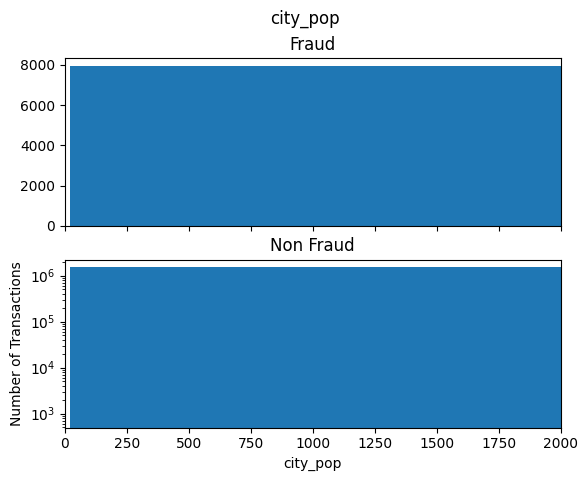

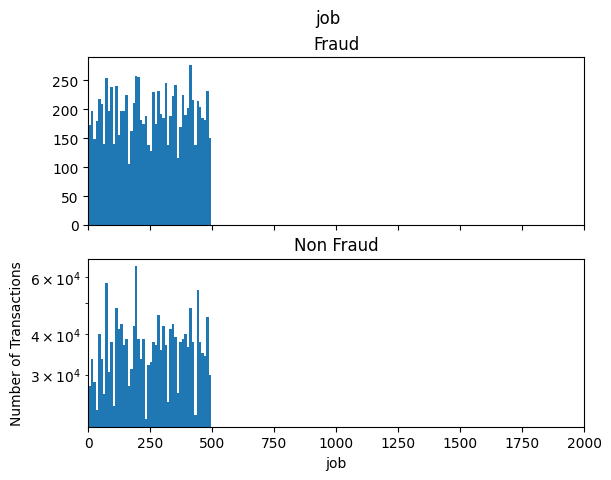

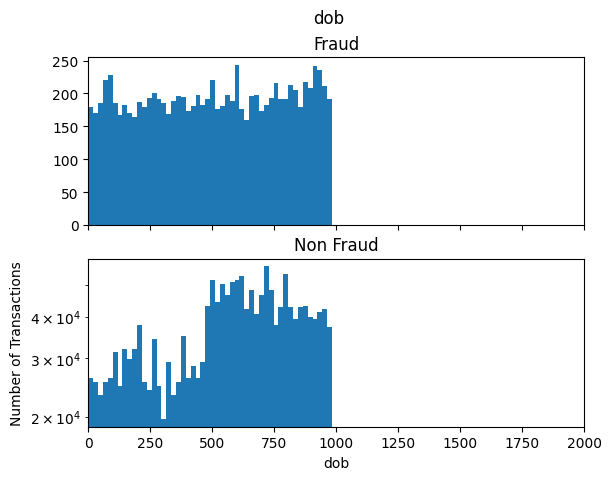

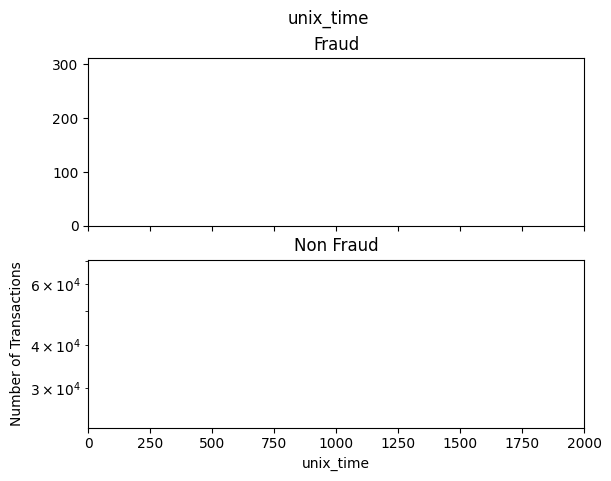

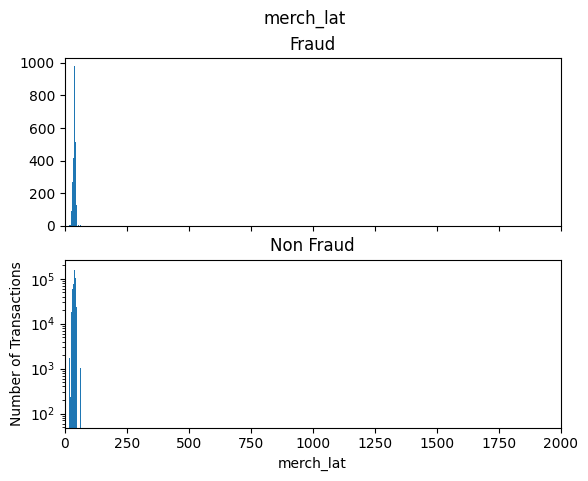

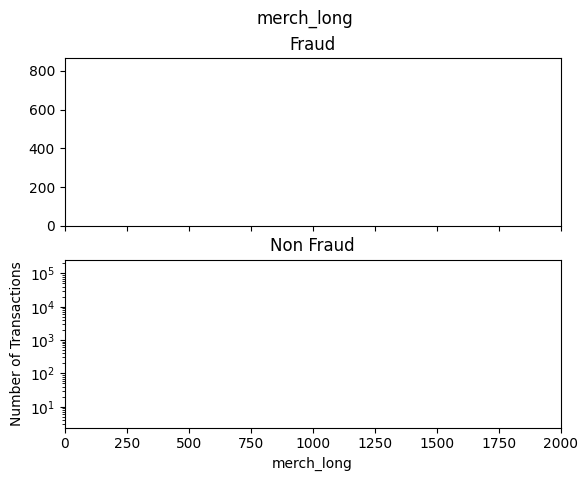

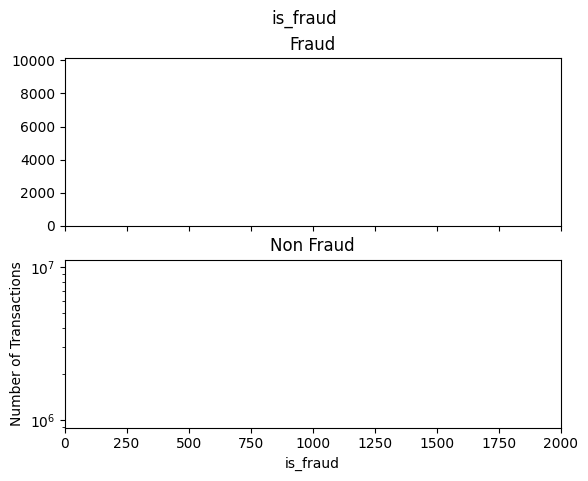

In [ ]:
for column in X.columns:
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    f.suptitle(column)
    bins = 50
    ax1.hist(fraud[column], bins = bins)
    ax1.set_title('Fraud')
    ax2.hist(non_fraud[column], bins = bins)
    ax2.set_title('Non Fraud')
    plt.xlabel(column)
    plt.ylabel('Number of Transactions')
    plt.xlim((0, 2000))
    plt.yscale('log')
    plt.show()

**Dropping more features as they do not really have any relation with fraud and non-fraud transactions**

In [ ]:
X_new = X.drop(['merchant', 'last', 'lat', 'merch_long', 'long', 'is_fraud', 'job', 'merch_lat'], axis = 1)
X_new.head()

,category,amt,first,gender,city,zip,city_pop,dob,unix_time
0,8,4.97,164,0,532,28654,3495,791,1325376018
1,4,107.23,312,0,619,99160,149,619,1325376044
2,0,220.11,116,1,474,83252,4154,309,1325376051
3,2,45.00,165,1,84,59632,1939,405,1325376076
4,9,41.96,339,1,217,24433,99,746,1325376186


**Separating the train and test datasets**

In [ ]:
X_, y_, X_test, y_test = X_new[:len(ccf_train)], y[:len(ccf_train)], X_new[len(ccf_train):], y[len(ccf_train):]

In [ ]:
y_.value_counts(), y_test.value_counts()

(is_fraud
 0    1289169
 1       7506
 Name: count, dtype: int64,
 is_fraud
 0    553574
 1      2145
 Name: count, dtype: int64)

**Getting cross-validation split from train set as it will be used for hyperparameter optimization**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.2, random_state = seed)
X_train.shape, y_train.shape, X_cv.shape,  y_cv.shape

((1037340, 9), (1037340,), (259335, 9), (259335,))

### Optimizing the hyperparameters for Random Forest

**Only `min_samples_split`, `max_depth` and `n_estimators` were optimized**

In [ ]:
min_sample_split_list = [2, 10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [1, 5, 7, 10, 50, 100, 500]

Min Sample Split = 2
Min Sample Split = 10
Min Sample Split = 30
Min Sample Split = 50
Min Sample Split = 100
Min Sample Split = 200
Min Sample Split = 300
Min Sample Split = 700


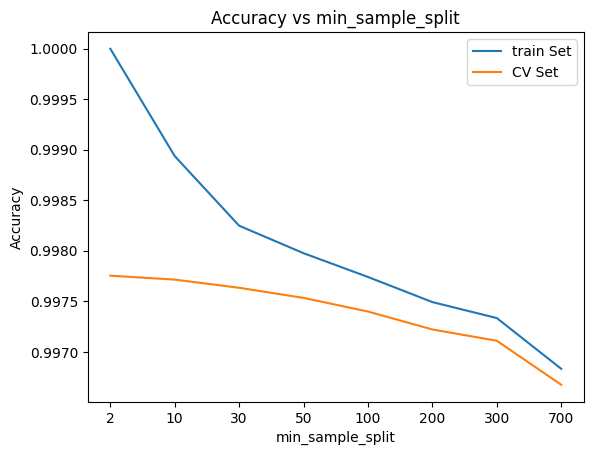

In [ ]:
accu_train = []
accu_cv = []

for min_sample_split in min_sample_split_list:
    rfc = RandomForestClassifier(n_jobs = -1, min_samples_split = min_sample_split, random_state = seed).fit(X_train, y_train)

    y_train_accu = rfc.predict(X_train)
    y_cv_accu = rfc.predict(X_cv)
    train_acc = accuracy_score(y_train, y_train_accu)
    cv_acc = accuracy_score(y_cv, y_cv_accu)

    accu_train.append(train_acc)
    accu_cv.append(cv_acc)
    print(f'Min Sample Split = {min_sample_split}')

plt.title('Accuracy vs min_sample_split')
plt.xlabel('min_sample_split')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(min_sample_split_list)), labels = min_sample_split_list)
plt.plot(accu_train, label = 'train')
plt.plot(accu_cv, label = 'cv')
plt.legend(['train Set', 'CV Set'])
plt.show()

**Taking `min_samples_split = 10` as it gives a good accuracy without overfitting**

Max Depth = 2
Max Depth = 4
Max Depth = 8
Max Depth = 16
Max Depth = 32
Max Depth = 64
Max Depth = None


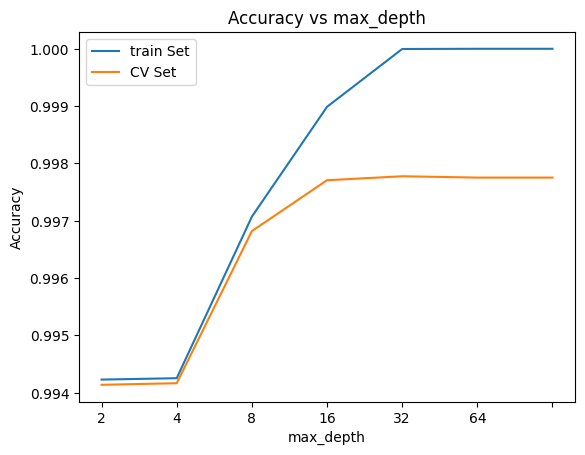

In [ ]:
accu_train = []
accu_cv = []

for max_depth in max_depth_list:
    rfc = RandomForestClassifier(n_jobs = -1, max_depth = max_depth, random_state = seed).fit(X_train, y_train)

    y_train_accu = rfc.predict(X_train)
    y_cv_accu = rfc.predict(X_cv)
    train_acc = accuracy_score(y_train, y_train_accu)
    cv_acc = accuracy_score(y_cv, y_cv_accu)

    accu_train.append(train_acc)
    accu_cv.append(cv_acc)
    print(f'Max Depth = {max_depth}')

plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(max_depth_list)), labels = max_depth_list)
plt.plot(accu_train, label = 'train')
plt.plot(accu_cv, label = 'cv')
plt.legend(['train Set', 'CV Set'])
plt.show()

**Choosing `max_depth = 16` as it gives a good accuracy and prevents overfitting**

N Estimators = 1
N Estimators = 5
N Estimators = 7
N Estimators = 10
N Estimators = 50
N Estimators = 100
N Estimators = 500


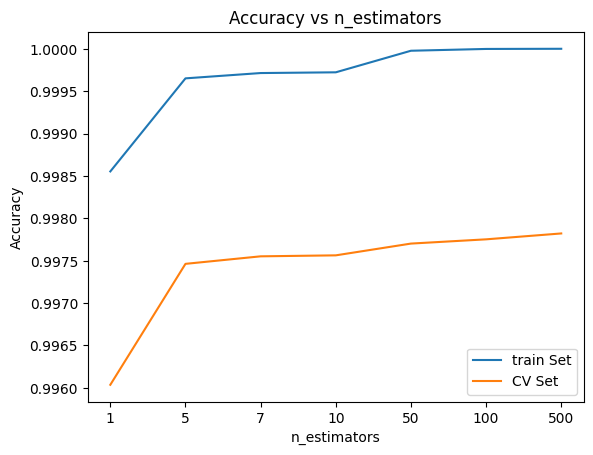

In [ ]:
accu_train = []
accu_cv = []

for n_estimators in n_estimators_list:
    rfc = RandomForestClassifier(n_jobs = -1, n_estimators = n_estimators, random_state = seed).fit(X_train, y_train)

    y_train_accu = rfc.predict(X_train)
    y_cv_accu = rfc.predict(X_cv)
    train_acc = accuracy_score(y_train, y_train_accu)
    cv_acc = accuracy_score(y_cv, y_cv_accu)

    accu_train.append(train_acc)
    accu_cv.append(cv_acc)
    print(f'N Estimators = {n_estimators}')

plt.title('Accuracy vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(n_estimators_list)), labels = n_estimators_list)
plt.plot(accu_train, label = 'train')
plt.plot(accu_cv, label = 'cv')
plt.legend(['train Set', 'CV Set'])
plt.show()

**Choosing `n_estimators = 100` as it gives a good accuracy**

### Training the Random Forest Classifier

In [ ]:
min_samples_split = 10
max_depth = 16
n_estimators = 100

rfc = RandomForestClassifier(min_samples_split = min_samples_split, max_depth = max_depth, n_estimators = n_estimators, n_jobs = -1, random_state = seed)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_split=10, n_jobs=-1,
                       random_state=42)

In [ ]:
train_pred = rfc.predict(X_train)
cv_pred = rfc.predict(X_cv)
test_pred = rfc.predict(X_test)
accuracy_score(train_pred, y_train), accuracy_score(y_cv, cv_pred), accuracy_score(y_test, test_pred)

(0.9985877340119922, 0.9976439740104498, 0.9978046458731841)

**We get the test accuracy as approx. `99.78%`**

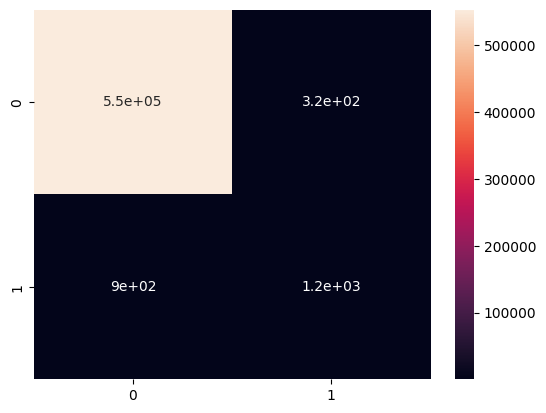

In [ ]:
confusion_matrix(y_test, test_pred)
sns.heatmap(confusion_matrix(y_test, test_pred), annot = True)
plt.show()